# Plot Thymus Analysis
- September 3, 2018
- Ruoyi Jiang
- Plot of the full rda 

In [1]:
options(warn = -1)

In [2]:
# Set directory of pipeline_abseq
pipeline_abseq_dir <- "/git/pipeline_abseq"

# Set directory to output figures
PLOT_DIR <- "/data/plots"

# Set location of RDA file
RDA_PUB_FILE <- "/data/db_full_prepare_v2.rda"

# Set location of dnapars executable
DNAPARS_EXEC <- "/usr/local/bin/dnapars"

# Set locaiton of clinical file
CLINICAL_FILE <- "/data/clinical.csv"

In [2]:
# # Set directory of pipeline_abseq
# pipeline_abseq_dir <- "~/Dropbox/hg/pipeline_abseq"

# # Set directory to output figures
# PLOT_DIR <- "~/Dropbox/Projects/OConnor_Thymus/manuscript/figures/prelim_v2"

# # Set location of RDA file
# RDA_PUB_FILE <- "~/Dropbox/Projects/OConnor_Thymus/analysis/db_full_prepare_v2.rda"

# # Set location of dnapars executable
# DNAPARS_EXEC <- "/home/ruoyi/kleinstein/unpackage/phylip-3.696/exe/dnapars"

# # Set locaiton of clinical file
# CLINICAL_FILE <- "~/Dropbox/Projects/OConnor_Thymus/Identification/clinical.csv"

In [3]:
library(shazam)
library(alakazam)
library(scales)
library(RColorBrewer)

library(tidyverse)
library(ggforce)

source(file.path(pipeline_abseq_dir, "api/saturn/saturn.R"))

Loading required package: ggplot2
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ 

# Load RDA

In [4]:
load(RDA_PUB_FILE)

In [5]:
DF <- ungroup(DF)

In [8]:
dim(DF) 

[1] 339978     86

# Set Colors

In [6]:
OVERLAP_PATIENT_COLORS = c(
"Intra-Patient" = "#636363",
'Inter-Patient' = "#bdbdbd"
)

In [7]:
OVERLAP_COLORS = c(
"Shared" = "#636363",
'Not Shared' = "#bdbdbd"
)

In [8]:
TIME_COLORS <- c(
'0 Months' = '#FFD700',
'12 Months' = '#B22222',
'Thymus' = '#6495ED' 
)

In [9]:
STATUS_COLORS <- c(
'THY' = '#6495ED',
'PCB' = 'FFBD33'
)

In [10]:
ISO_CHOICES <- c("IgM", "IgG", "IgA")

In [11]:
thymectomy_patients = DF %>% ungroup() %>% filter(STATUS == "THY") %>% select(PATIENT) %>% unlist() %>% unique()

In [12]:
thymectomy_patients

[1] THY1 THY2 THY3 THY4 THY5 THY6 THY7 THY8
Levels: THY1 THY2 THY3 THY4 THY5 THY6 THY7 THY8

# 1. Thymus vs Time 0 Blood

### Diversity

In [23]:
# 10 mins
div <- rarefyDiversity(DF, "PATIENT_TIME", clone="CLONE", min_q=0, max_q=2, step_q=2, ci=0.95, nboot=1000)

Warning message:
“'rarefyDiversity' is deprecated.
Use 'alphaDiversity' instead.
See help("Deprecated")”

[1] 0 2


In [24]:
even <- div@diversity

In [17]:
even_tab <- even %>%
    rowwise() %>%
    mutate(PATIENT = strsplit(PATIENT_TIME, split = '_')[[1]][1], TIME = strsplit(PATIENT_TIME, split = '_')[[1]][2]) %>%
    filter(Q == 2, TIME != '12', PATIENT %in% thymectomy_patients) %>%
    mutate(TIME = if(TIME != "Thymus"){paste(TIME, "Months")}else{TIME})

In [37]:
# For calculation of number of richness of each sample (for lineage analysis)
# richness_df <- even %>%
#     rowwise() %>%
#     mutate(PATIENT = strsplit(PATIENT_TIME, split = '_')[[1]][1], TIME = strsplit(PATIENT_TIME, split = '_')[[1]][2]) %>%
#     filter(Q == 0, TIME != '12', PATIENT %in% thymectomy_patients) %>%
#     select(D, PATIENT, TIME) %>%
#     rename(NUMBER_OF_CLONES = D) %>%
#     bind_cols(DF %>%
#     group_by(CLONE, PATIENT, TIME) %>%
#     summarize(SIZE = n()) %>%
#     group_by(PATIENT, TIME) %>%
#     summarize(SEQ_PER_CLONE = mean(SIZE)) %>%
#     filter(TIME != '12 Months')) %>%
#     mutate(NUMBER_OF_SEQS = NUMBER_OF_CLONES * SEQ_PER_CLONE)

In [18]:
even_sum <- even_tab %>%
    group_by(TIME) %>%
    summarize(MEAN=mean(D, na.rm=T), SD=sd(D, na.rm=T))   

Warning message:
“Grouping rowwise data frame strips rowwise nature”

Warning message:
“Ignoring unknown aesthetics: x”

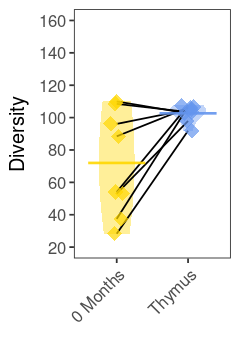

In [19]:
options(repr.plot.width=2, repr.plot.height=3)

d2 <- ggplot(even_tab, aes(x=TIME, y=D)) + 
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +    xlab("") +
    ylab(expression("Diversity")) +
    scale_y_continuous(breaks=seq(0, 200, 20), limits=c(20,160)) +
    scale_fill_manual(values=TIME_COLORS, name="Status") +
    scale_color_manual(values=TIME_COLORS, name="Status") +
    geom_violin(aes(fill=TIME), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_line(aes(group = PATIENT)) +
    geom_errorbarh(data=even_sum, 
                   aes(x=TIME, y=MEAN, color=TIME, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=TIME), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7)
plot(d2)

In [248]:
plotFigure(d2, file.path(PLOT_DIR, "diversity.pdf"), 2, 3)

png 
  2

In [20]:
even_tab %>% 
    filter(Q == 2) %>%
    computeTest(value = "D", comparison = "TIME", pairing = "PATIENT")

P_PAIR     P_UNPAIR   P_WILCOX  DIFF     COMPARE        
1 0.02613954 0.01978118 0.1303807 -30.6547 0 Months-Thymus

### Isotype

In [298]:
isotype_tab <- DF %>%
    filter( TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
     filter(CREGION %in% ISO_CHOICES) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(TIME, PATIENT, CREGION) %>%
    summarize(ISO_COUNT=n()) %>%
    group_by(TIME, PATIENT) %>%
    mutate(ISO_FREQ=ISO_COUNT/sum(ISO_COUNT, na.rm=T))  

In [299]:
isotype_sum <- isotype_tab  %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(TIME, CREGION) %>%
    summarize(MEAN=mean(ISO_FREQ, na.rm=T), SD=sd(ISO_FREQ, na.rm=T))   

In [300]:
isotype_sum

TIME     CREGION MEAN       SD        
1 0 Months IgM     0.33894777 0.14321935
2 0 Months IgG     0.27966360 0.10924191
3 0 Months IgA     0.38138863 0.13970767
4 Thymus   IgM     0.07146183 0.04456092
5 Thymus   IgG     0.85410038 0.05669800
6 Thymus   IgA     0.07443780 0.02346619

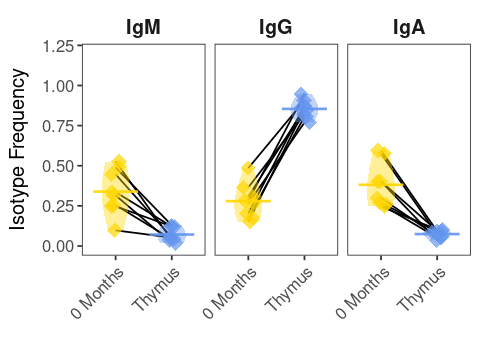

In [61]:
options(repr.plot.width=4, repr.plot.height=3)

isotype_sum <- isotype_tab %>%
    group_by(TIME, CREGION) %>%
    summarize(MEAN=mean(ISO_FREQ, na.rm=T), SD=sd(ISO_FREQ, na.rm=T))   

m1 <- ggplot(isotype_tab, aes(x=TIME, y=ISO_FREQ)) +
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("Isotype Frequency")) +
    scale_fill_manual(values=TIME_COLORS, name="Status") +
    scale_color_manual(values=TIME_COLORS, name="Status") +
    geom_line(aes(group = PATIENT)) +
    scale_y_continuous(limits=c(0,1.2)) +
    geom_violin(aes(fill=TIME), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_errorbarh(data=isotype_sum, 
                   aes(y=MEAN, color=TIME, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=TIME), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    facet_grid(. ~ CREGION)
plot(m1)

In [62]:
plotFigure(m1, file.path(PLOT_DIR, "isotype.pdf"), 4, 3)

png 
  2

In [63]:
isotype_tab %>% group_by(CREGION) %>%
    do(computeTest(., value = "ISO_FREQ", comparison = "TIME", pairing = "PATIENT"))

CREGION P_PAIR       P_UNPAIR     P_WILCOX     DIFF       COMPARE        
1 IgM     1.284613e-03 1.792801e-04 0.0010878011  0.2674859 0 Months-Thymus
2 IgG     1.265264e-06 2.724495e-09 0.0001554002 -0.5744368 0 Months-Thymus
3 IgA     4.393681e-04 2.612709e-05 0.0001554002  0.3069508 0 Months-Thymus

In [64]:
aov(ISO_FREQ ~ TIME*CREGION, data = isotype_tab) %>% summary()

             Df Sum Sq Mean Sq F value   Pr(>F)    
TIME          1  0.000  0.0000    0.00        1    
CREGION       2  1.313  0.6566   68.26 6.35e-14 ***
TIME:CREGION  2  1.983  0.9915  103.08  < 2e-16 ***
Residuals    42  0.404  0.0096                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### SHM

In [301]:
mut_tab <- DF %>%
    filter( TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
     filter(CREGION %in% ISO_CHOICES) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(PATIENT, TIME,  CREGION) %>%
    group_by(PATIENT, TIME, CREGION) %>%
    summarize(MEAN=mean(MU_FREQ), SD = sd(MU_FREQ))

mut_sum <- mut_tab %>%
    group_by(TIME, CREGION) %>%
    summarize(MEAN=mean(MEAN, na.rm=T), SD=sd(MEAN, na.rm=T)) 

In [302]:
mut_sum

TIME     CREGION MEAN       SD
1 0 Months IgM     0.02262183 NA
2 0 Months IgG     0.05494732 NA
3 0 Months IgA     0.06037551 NA
4 Thymus   IgM     0.02645014 NA
5 Thymus   IgG     0.06317754 NA
6 Thymus   IgA     0.05789239 NA

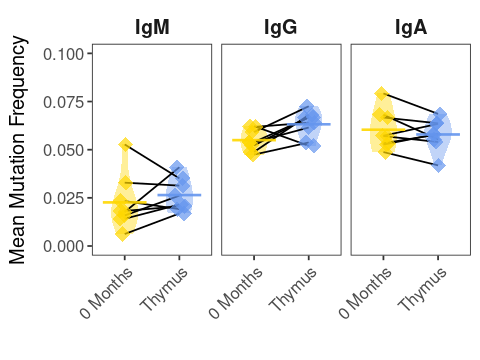

In [66]:
options(repr.plot.width=4, repr.plot.height=3)

m2 <- ggplot(mut_tab, aes(x=TIME, y=MEAN)) +
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle = 45, hjust = 1, vjust = 1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("Mean Mutation Frequency")) +
    scale_fill_manual(values=TIME_COLORS, name="Status") +
    scale_color_manual(values=TIME_COLORS, name="Status") +
    geom_violin(aes(fill=TIME), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_line(aes(group = PATIENT)) +
    scale_y_continuous(limits=c(0,0.1)) +
    geom_errorbarh(data=mut_sum, 
                   aes(y=MEAN, color=TIME, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=TIME), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    facet_grid(. ~ CREGION)
plot(m2)

In [67]:
plotFigure(m2, file.path(PLOT_DIR, "shm.pdf"), 4, 3)

png 
  2

In [68]:
mut_tab %>% 
    group_by(CREGION) %>%
    do(computeTest(., value = "MEAN", comparison = "TIME", pairing = "PATIENT"))

CREGION P_PAIR     P_UNPAIR   P_WILCOX   DIFF         COMPARE        
1 IgM     0.40195989 0.52721178 0.23449883 -0.003828309 0 Months-Thymus
2 IgG     0.03869576 0.02234302 0.04988345 -0.008230218 0 Months-Thymus
3 IgA     0.37467589 0.59667197 0.95912976  0.002483120 0 Months-Thymus

In [69]:
aov(MEAN ~ TIME*CREGION, data = mut_tab) %>% summary()

             Df   Sum Sq  Mean Sq F value   Pr(>F)    
TIME          1 0.000122 0.000122   1.386    0.246    
CREGION       2 0.012742 0.006371  72.220 2.55e-14 ***
TIME:CREGION  2 0.000232 0.000116   1.315    0.279    
Residuals    42 0.003705 0.000088                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### N-Glyc

In [20]:
glyc_tab <- DF %>%
    filter(TIME != "0 Months") %>%
    mutate(TIME = factor(TIME, levels = c("12 Months", "Thymus"))) %>%
    filter(CREGION %in% ISO_CHOICES) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(TIME, PATIENT, CREGION) %>%
    summarize(MEAN=mean(GLYCOSYLATION_COUNT_V_SEQUENCE), SD = sd(GLYCOSYLATION_COUNT_V_SEQUENCE)) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES))

In [21]:
glyc_sum <- glyc_tab %>%
    group_by(TIME, CREGION) %>%
    summarize(MEAN=mean(MEAN, na.rm=T), SD=sd(MEAN, na.rm=T)) 

In [22]:
glyc_sum

TIME      CREGION MEAN       SD
1 12 Months IgM     0.07923487 NA
2 12 Months IgG     0.07994086 NA
3 12 Months IgA     0.08226488 NA
4 Thymus    IgM     0.12046981 NA
5 Thymus    IgG     0.14492684 NA
6 Thymus    IgA     0.08951142 NA

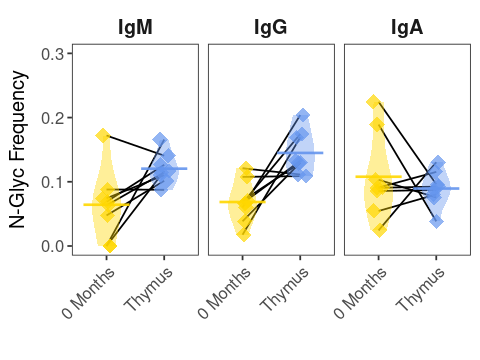

In [72]:
options(repr.plot.width=4, repr.plot.height=3)

m2 <- ggplot(glyc_tab, aes(x=TIME, y=MEAN)) +
    baseTheme() + 
    #strip text removes the Q labels
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle = 45, hjust = 1, vjust = 1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("N-Glyc Frequency")) +
    scale_fill_manual(values=TIME_COLORS, name="Status") +
    scale_color_manual(values=TIME_COLORS, name="Status") +
    scale_y_continuous(limits=c(0,0.3)) +
    geom_line(aes(group = PATIENT)) +
    geom_errorbarh(data=glyc_sum, 
                   aes(y=MEAN, color=TIME, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_violin(aes(fill=TIME), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_point(aes(color=TIME), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    facet_grid(. ~ CREGION)
plot(m2)

In [74]:
plotFigure(m2, file.path(PLOT_DIR, "glyc.pdf"), 4, 3)

png 
  2

In [73]:
glyc_tab %>% 
    group_by(CREGION) %>%
    do(computeTest(., value = "MEAN", comparison = "TIME", pairing = "PATIENT"))

Warning message in wilcox.test.default(unlist(paired_df[, as.character(items[1])]), :
“cannot compute exact p-value with ties”

CREGION P_PAIR      P_UNPAIR     P_WILCOX     DIFF        COMPARE        
1 IgM     0.037449897 0.0184633707 0.0180440947 -0.05621562 0 Months-Thymus
2 IgG     0.008478133 0.0004630223 0.0006216006 -0.07640118 0 Months-Thymus
3 IgA     0.557254556 0.4831119256 0.8784770785  0.01837031 0 Months-Thymus

In [75]:
aov(MEAN ~ TIME*CREGION, data = glyc_tab) %>% summary()

             Df  Sum Sq  Mean Sq F value  Pr(>F)   
TIME          1 0.01740 0.017403   9.470 0.00367 **
CREGION       2 0.00166 0.000829   0.451 0.63992   
TIME:CREGION  2 0.01994 0.009968   5.424 0.00803 **
Residuals    42 0.07718 0.001838                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### N-Glyc Germline reversion

In [77]:
glyc_germline_tab <- DF %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION %in% ISO_CHOICES) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(TIME, PATIENT, CREGION) %>%
    summarize(MEAN=mean(GLYCOSYLATION_COUNT_V_GERMLINE), SD = sd(GLYCOSYLATION_COUNT_V_GERMLINE)) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES))

In [78]:
glyc_germline_sum <- glyc_germline_tab %>%
    group_by(TIME, CREGION) %>%
    summarize(MEAN=mean(MEAN, na.rm=T), SD=sd(MEAN, na.rm=T)) 

In [304]:
glyc_germline_sum 

TIME     CREGION MEAN       SD
1 0 Months IgM     0.05009613 NA
2 0 Months IgG     0.03801307 NA
3 0 Months IgA     0.06194291 NA
4 Thymus   IgM     0.10192995 NA
5 Thymus   IgG     0.04593981 NA
6 Thymus   IgA     0.03665331 NA

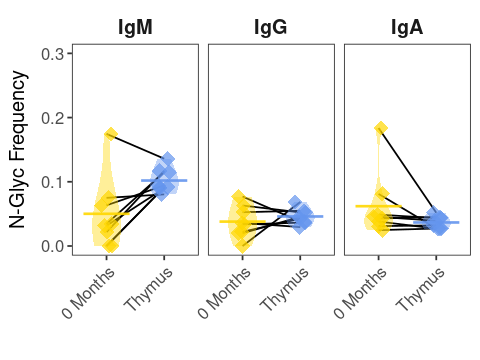

In [79]:
options(repr.plot.width=4, repr.plot.height=3)

m2 <- ggplot(glyc_germline_tab, aes(x=TIME, y=MEAN)) +
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle = 45, hjust = 1, vjust = 1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("N-Glyc Frequency")) +
    scale_fill_manual(values=TIME_COLORS, name="Status") +
    scale_color_manual(values=TIME_COLORS, name="Status") +
    scale_y_continuous(limits=c(0,0.3)) +
    geom_line(aes(group = PATIENT)) +
    geom_errorbarh(data=glyc_germline_sum, 
                   aes(y=MEAN, color=TIME, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_violin(aes(fill=TIME), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_point(aes(color=TIME), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    facet_grid(. ~ CREGION)
plot(m2)

In [41]:
plotFigure(m2, file.path(PLOT_DIR, "germ_glyc.pdf"), 4, 3)

png 
  2

In [80]:
glyc_germline_tab %>% 
    group_by(CREGION) %>%
    do(computeTest(., value = "MEAN", comparison = "TIME", pairing = "PATIENT"))

Warning message in wilcox.test.default(unlist(paired_df[, as.character(items[1])]), :
“cannot compute exact p-value with ties”

CREGION P_PAIR     P_UNPAIR   P_WILCOX   DIFF         COMPARE        
1 IgM     0.01980476 0.02825992 0.01351847 -0.051833820 0 Months-Thymus
2 IgG     0.49893544 0.43567546 0.38228438 -0.007926742 0 Months-Thymus
3 IgA     0.17063995 0.19736187 0.32820513  0.025289595 0 Months-Thymus

In [81]:
aov(MEAN ~ TIME*CREGION, data = glyc_germline_tab) %>% summary()

             Df  Sum Sq  Mean Sq F value Pr(>F)  
TIME          1 0.00158 0.001584   1.327 0.2559  
CREGION       2 0.01027 0.005135   4.300 0.0200 *
TIME:CREGION  2 0.01197 0.005986   5.012 0.0112 *
Residuals    42 0.05016 0.001194                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### IgG Gene Analysis

In [6]:
plotGeneSet <- function(gene_tab){
    
    gene_tab_df <- gene_tab %>%
    group_by( GENE, TIME, PATIENT) %>%
    summarize(MEAN_FREQ=mean(SEQ_FREQ, na.rm=T), SD_FREQ=sd(SEQ_FREQ, na.rm=T))

    gene_sum <- gene_tab_df %>%
        group_by(GENE, TIME) %>%
        summarize(MEAN=mean(MEAN_FREQ, na.rm=T), SD=sd(MEAN_FREQ, na.rm=T))   

    p <- ggplot(gene_tab_df, aes(x=TIME, y=MEAN_FREQ)) +
        baseTheme() + 
        theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=8), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
        xlab("") +
        ylab(expression("Gene Frequency")) +
        geom_violin(aes(fill=TIME), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
        scale_fill_manual(values=TIME_COLORS, name="Status") +
        scale_color_manual(values=TIME_COLORS, name="Status") +
        geom_line(aes(group = PATIENT)) +
        geom_errorbarh(data=gene_sum, 
                       aes(y=MEAN, color=TIME, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                       height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
        geom_point(aes(color=TIME), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
        facet_grid(. ~ GENE)

    return(p)
}

In [7]:
grouping <- c('STATUS', 'TIME', 'PATIENT', 'CREGION')

vfam_tab <- countGenes(DF, gene= 'V_CALL', groups=grouping, mode = 'family') %>%
    countAbsent(groups=grouping)
vgene_tab <- countGenes(DF, gene= 'V_CALL', groups=grouping, mode = 'gene') %>%
    countAbsent(groups=grouping) 
jgene_tab <- countGenes(DF, gene= 'J_CALL', groups=grouping, mode = 'gene') %>%
    countAbsent(groups=grouping)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(groups)` instead of `groups` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(count_columns)` instead of `count_columns` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


In [23]:
thymus_vec <- vgene_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG") %>%
    group_by(GENE, TIME) %>%
    summarize(MEAN=mean(SEQ_FREQ, na.rm=T), SD=sd(SEQ_FREQ, na.rm=T)) %>%
    select(-SD) %>%
    spread(TIME, MEAN) %>%
    rowwise() %>%
    mutate(DIFF = !!rlang::sym("Thymus") - !!rlang::sym("0 Months"), 
          LOG_DIFF = log(!!rlang::sym("Thymus")/!!rlang::sym("0 Months"))
          ) %>%
    select(GENE, DIFF, LOG_DIFF) %>% arrange(DIFF)

In [26]:
thymus_vec %>% write.csv("/home/ruoyi/kleinstein/projects/oconnor_neuronext/analysis/thymus_vec.csv")

In [84]:
select_genes <- c("IGHV1-69", "IGHV4-34", "IGHV1-8", "IGHV3-23", "IGHV4-59")

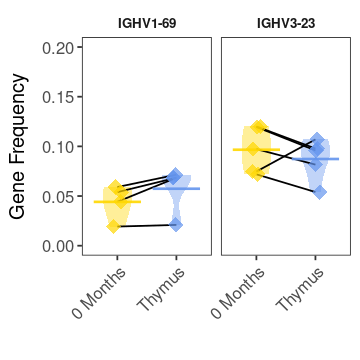

In [85]:
options(repr.plot.width=3, repr.plot.height=3)
p <- vgene_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG", GENE %in% select_genes) %>%
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) %>%
    plotGeneSet() + scale_y_continuous(limits=c(0,0.2))
plot(p)

In [86]:
plotFigure(p, file.path(PLOT_DIR, "vgene.pdf"), 3, 3)

png 
  2

In [87]:
vgene_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG", GENE %in% select_genes) %>% 
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) %>%
    do(computeTest(., value = "SEQ_FREQ", comparison = "TIME", pairing = "PATIENT"))

GENE     P_PAIR     P_UNPAIR  P_WILCOX  DIFF         COMPARE        
1 IGHV1-69 0.06457501 0.4126113 0.2000000 -0.013225232 0 Months-Thymus
2 IGHV3-23 0.42332125 0.5195858 0.6904762  0.009380017 0 Months-Thymus

In [88]:
totest <- vgene_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG", GENE %in% select_genes) %>%
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6)

aov(SEQ_FREQ~GENE*TIME, data=totest) %>% summary()

            Df   Sum Sq  Mean Sq F value Pr(>F)   
GENE         1 0.007549 0.007549  16.041 0.0013 **
TIME         1 0.000002 0.000002   0.004 0.9489   
GENE:TIME    1 0.000568 0.000568   1.207 0.2905   
Residuals   14 0.006588 0.000471                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

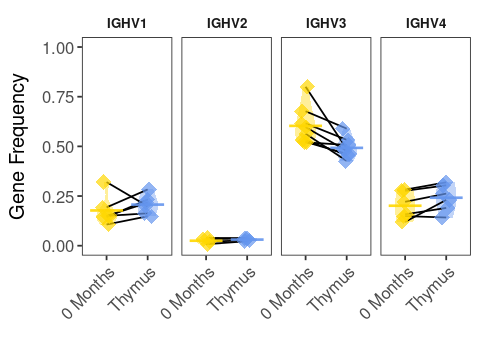

In [89]:
options(repr.plot.width=4, repr.plot.height=3)
p <- vfam_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG") %>%
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) %>%
    plotGeneSet() + scale_y_continuous(limits=c(0,1.0))
plot(p)

In [90]:
plotFigure(p, file.path(PLOT_DIR, "vfam.pdf"), 4, 3)

png 
  2

In [91]:
vfam_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG") %>% 
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) %>%
    do(computeTest(., value = "SEQ_FREQ", comparison = "TIME", pairing = "PATIENT"))

GENE  P_PAIR     P_UNPAIR   P_WILCOX    DIFF         COMPARE        
1 IGHV1 0.40333610 0.43590238 0.240259740 -0.029722238 0 Months-Thymus
2 IGHV2 0.19513110 0.50058564 0.685714286 -0.005681567 0 Months-Thymus
3 IGHV3 0.01027649 0.01215503 0.006993007  0.110648307 0 Months-Thymus
4 IGHV4 0.05077789 0.33352509 0.393939394 -0.040158175 0 Months-Thymus

In [92]:
totest <- vfam_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG") %>% 
    group_by(GENE) %>%
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6)

aov(SEQ_FREQ~GENE*TIME, data=totest) %>% summary()

            Df Sum Sq Mean Sq F value Pr(>F)    
GENE         3 1.7839  0.5946 139.415 <2e-16 ***
TIME         1 0.0041  0.0041   0.959 0.3332    
GENE:TIME    3 0.0524  0.0175   4.098 0.0126 *  
Residuals   40 0.1706  0.0043                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

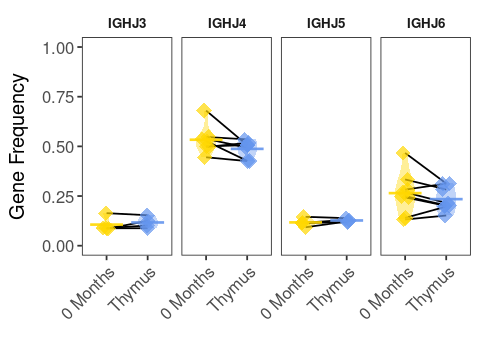

In [93]:
options(repr.plot.width=4, repr.plot.height=3)
p <- jgene_tab %>%
    filter(TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    filter(CREGION == "IgG") %>% 
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) %>%
    plotGeneSet() + scale_y_continuous(limits=c(0,1.0))
plot(p)

In [94]:
plotFigure(p, file.path(PLOT_DIR, "jgene.pdf"), 4, 3)

png 
  2

In [95]:
jgene_tab %>%
    filter(STATUS == "THY", TIME != "12 Months", TIME != "Posterior_Thymus") %>%
    filter(CREGION == "IgG") %>% 
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) %>%
    do(computeTest(., value = "SEQ_FREQ", comparison = "TIME", pairing = "PATIENT"))

GENE  P_PAIR    P_UNPAIR  P_WILCOX  DIFF        COMPARE        
1 IGHJ3 0.3997506 0.6715601 0.6857143 -0.01065897 0 Months-Thymus
2 IGHJ4 0.1251187 0.1768339 0.2086247  0.04611294 0 Months-Thymus
3 IGHJ5 0.2883345 0.4270674 0.3428571 -0.00996839 0 Months-Thymus
4 IGHJ6 0.2399374 0.5004594 0.7209013  0.02996724 0 Months-Thymus

In [96]:
totest <- jgene_tab %>%
    filter(STATUS == "THY", TIME != "12 Months", TIME != "Posterior_Thymus") %>%
    filter(CREGION == "IgG") %>% 
    group_by(GENE, PATIENT) %>% filter(all(SEQ_COUNT > 5)) %>%
    group_by(GENE) %>% filter(n() > 6) 

aov(SEQ_FREQ~GENE*TIME, data=totest) %>% summary()

            Df Sum Sq Mean Sq F value Pr(>F)    
GENE         3 1.1835  0.3945  95.482 <2e-16 ***
TIME         1 0.0050  0.0050   1.212  0.278    
GENE:TIME    3 0.0065  0.0022   0.520  0.671    
Residuals   38 0.1570  0.0041                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### BASELINe analysis (IgGs)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


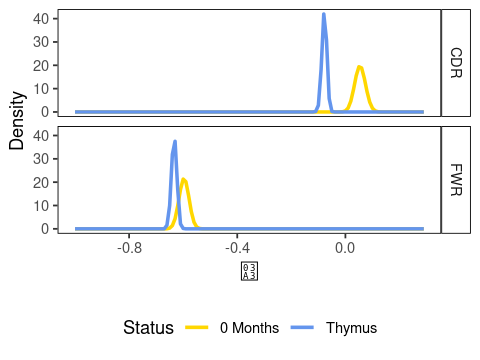

In [15]:
options(repr.plot.width=4, repr.plot.height=3)
b2 <- plotBaselineDensity(baseline_grp_igg, idColumn="TIME", facetBy="region", sigmaLimits=c(-1, 0.3), colorValues = TIME_COLORS, silent=TRUE) +
#plotBaselineSummary(baseline_grp, idColumn="STATUS", facetBy="region", title = paste("Baseline Status", labels[1]))
theme(legend.position="bottom") +
scale_color_manual(values=TIME_COLORS, name="Status")
plot(b2)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


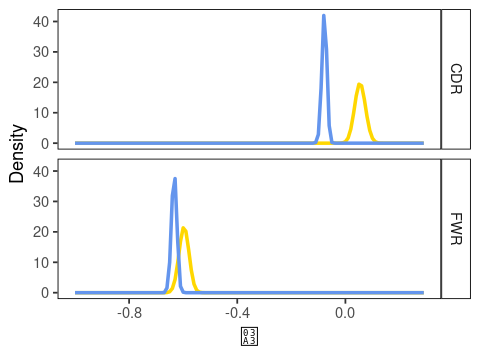

In [97]:
options(repr.plot.width=4, repr.plot.height=3)
b2 <- plotBaselineDensity(baseline_grp_igg, idColumn="TIME", facetBy="region", sigmaLimits=c(-1, 0.3), colorValues = TIME_COLORS, silent=TRUE) +
#plotBaselineSummary(baseline_grp, idColumn="STATUS", facetBy="region", title = paste("Baseline Status", labels[1]))
theme(legend.position="none") +
scale_color_manual(values=TIME_COLORS, name="Status")
plot(b2)

In [98]:
test_igg <- testBaseline(baseline_grp_igg, "TIME")
test_igg %>%
    rowwise() %>%
    mutate(SIGNIFICANT = (PVALUE < 0.05))

REGION TEST               PVALUE       FDR          SIGNIFICANT
1 CDR    Thymus != 0 Months 1.013770e-09 2.027540e-09 TRUE       
2 FWR    Thymus != 0 Months 4.306752e-02 4.306752e-02 TRUE

In [16]:
plotFigure(b2, file.path(PLOT_DIR, "baseline.pdf"), 4, 3)

png 
  2

# 2. Features of clonal overlap

In [15]:
DF_OVERLAP <- DF %>% 
    ungroup() %>%
    filter( TIME != "12 Months") %>%
    mutate(TIME = factor(TIME, levels = c("0 Months", "Thymus"))) %>%
    group_by(PATIENT, CLONE) %>%
    mutate(OVERLAP_COLLAPSE = paste(unique(TIME), collapse =',')) %>%
    rowwise() %>%
    mutate(OVERLAP = if(grepl("0", OVERLAP_COLLAPSE) & grepl("Thymus", OVERLAP_COLLAPSE)){'Shared'}else{'Not Shared'}) 

In [16]:
DF_OVERLAP <- DF_OVERLAP %>%
    mutate(PATIENT_TIME_OVERLAP = paste(PATIENT_TIME, OVERLAP, sep = ","))

### Diversity of overlapping seqs in blood

In [78]:
div_overlap <- DF_OVERLAP %>% 
        ungroup() %>% 
        filter(TIME == "0 Months"), 
        rarefyDiversity("PATIENT_TIME_OVERLAP", clone="CLONE", min_q=0, max_q=4, step_q=2, ci=0.95, nboot=2000, min_n = 10)
even_overlap <- div_overlap@diversity

Warning message:
“'rarefyDiversity' is deprecated.
Use 'alphaDiversity' instead.
See help("Deprecated")”Warning message in estimateAbundance(data, group = group, clone = clone, copy = copy, :
“Not all groups passed threshold min_n=10. Excluded: THY4_0,Shared”

[1] 0 2 4


In [16]:
even_tab <- even_overlap %>%
    rowwise() %>%
    mutate(PATIENT_TIME = strsplit(PATIENT_TIME_OVERLAP, ",")[[1]][1], OVERLAP =  strsplit(PATIENT_TIME_OVERLAP, ",")[[1]][2]) %>%
    mutate(PATIENT = strsplit(PATIENT_TIME, split = '_')[[1]][1], TIME = strsplit(PATIENT_TIME, split = '_')[[1]][2]) %>%
    filter(Q == 2) %>%
    mutate(TIME = if(TIME != "Thymus"){paste(TIME, "Months")}else{TIME}) %>%
    mutate(Q_FANCY = paste0("Q = ", Q))

even_sum <- even_tab %>%
    group_by(OVERLAP,  Q) %>%
    summarize(MEAN=mean(D, na.rm=T), SD=sd(D, na.rm=T)) 

Warning message:
“Grouping rowwise data frame strips rowwise nature”

Warning message:
“Ignoring unknown aesthetics: x”

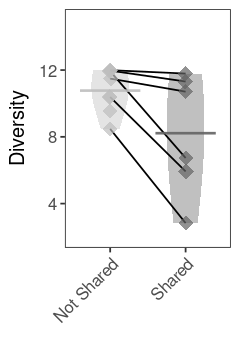

In [17]:
options(repr.plot.width=2, repr.plot.height=3)

d2 <- ggplot(even_tab, aes(x=OVERLAP, y=D)) + 
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +    xlab("") +
    ylab(expression("Diversity")) +
    scale_y_continuous(limits =c(2,15)) +
    scale_fill_manual(values=OVERLAP_COLORS, name="Status") +
    scale_color_manual(values=OVERLAP_COLORS, name="Status") +
    geom_violin(aes(fill=OVERLAP), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_line(aes(group = PATIENT)) +
    geom_errorbarh(data=even_sum, 
                   aes(x=OVERLAP, y=MEAN, color=OVERLAP, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=OVERLAP), position=position_jitter(w = 0.01, h = 0), size=4, pch=18, alpha=0.7)
plot(d2)

In [18]:
plotFigure(d2, file.path(PLOT_DIR, "diversity_overlap_blood.pdf"), 2, 3)

png 
  2

In [19]:
even_tab %>% 
    group_by(Q) %>%
    do(computeTest(., value = "D", comparison = "OVERLAP", pairing = "PATIENT"))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

Q P_PAIR     P_UNPAIR   P_WILCOX  DIFF COMPARE          
1 4 0.04110603 0.08619929 0.1811522 NA   Not Shared-Shared

### Isotype distribution of overlap in blood

In [20]:
# Count isotypes
isotype_tab <- DF_OVERLAP %>%
    filter(CREGION %in% ISO_CHOICES) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(TIME, PATIENT, CREGION, OVERLAP) %>%
    summarize(ISO_COUNT=n()) %>%
    ungroup() %>%
    complete(TIME, PATIENT, CREGION, OVERLAP, fill=list(ISO_COUNT=0)) %>%
    group_by(TIME, PATIENT, OVERLAP) %>%
    mutate(ISO_FREQ=ISO_COUNT/sum(ISO_COUNT, na.rm=T))  %>%
    filter(TIME == "0 Months") %>% group_by(PATIENT) %>% filter(n()==6)

isotype_sum <- isotype_tab %>%
    group_by(TIME, CREGION, OVERLAP) %>%
    summarize(MEAN=mean(ISO_FREQ, na.rm=T), SD=sd(ISO_FREQ, na.rm=T))   

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [21]:
isotype_sum

TIME     CREGION OVERLAP    MEAN      SD        
1 0 Months IgM     Not Shared 0.3579753 0.15921916
2 0 Months IgM     Shared     0.2419154 0.18429762
3 0 Months IgG     Not Shared 0.2545445 0.09959337
4 0 Months IgG     Shared     0.4407201 0.17809033
5 0 Months IgA     Not Shared 0.3874802 0.14768175
6 0 Months IgA     Shared     0.3173645 0.19489069

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

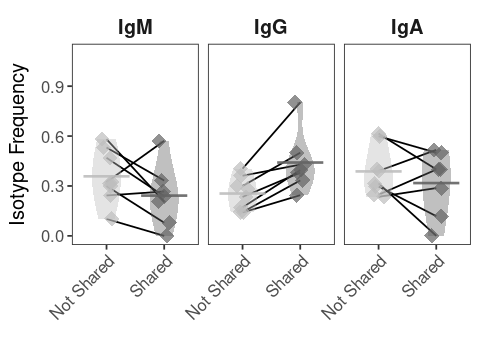

In [22]:
options(repr.plot.width=4, repr.plot.height=3)

m1 <- ggplot(isotype_tab, aes(x=OVERLAP, y=ISO_FREQ)) +
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("Isotype Frequency")) +
    scale_fill_manual(values=OVERLAP_COLORS, name="Status") +
    scale_color_manual(values=OVERLAP_COLORS, name="Status") +
    scale_y_continuous(limits =c(0,1.1)) +
    geom_line(aes(group = PATIENT)) +
    geom_violin(aes(fill=OVERLAP), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_errorbarh(data=isotype_sum, 
                   aes(y=MEAN, color=OVERLAP, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=OVERLAP), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    facet_grid(. ~ CREGION)
plot(m1)

In [23]:
plotFigure(m1, file.path(PLOT_DIR, "isotype_overlap_blood.pdf"), 4, 3)

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

png 
  2

In [24]:
isotype_tab %>% 
    group_by(CREGION) %>%
    do(computeTest(., value = "ISO_FREQ", comparison = "OVERLAP", pairing = "PATIENT"))

CREGION P_PAIR      P_UNPAIR   P_WILCOX   DIFF COMPARE          
1 IgM     0.164779647 0.21304414 0.18927739 NaN  Not Shared-Shared
2 IgG     0.003377604 0.02442387 0.02051282 NaN  Not Shared-Shared
3 IgA     0.357954251 0.44267965 0.69432789 NaN  Not Shared-Shared

In [25]:
aov(ISO_FREQ~CREGION*OVERLAP, data=isotype_tab) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)  
CREGION          2 0.0209 0.01047    0.40 0.6732  
OVERLAP          1 0.0000 0.00000    0.00 1.0000  
CREGION:OVERLAP  2 0.1980 0.09902    3.78 0.0316 *
Residuals       39 1.0215 0.02619                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3 observations deleted due to missingness

### SHM distribution of overlap in blood

In [32]:
mut_tab <- DF_OVERLAP %>%
    filter(CREGION %in% ISO_CHOICES) %>%
    mutate(CREGION = factor(CREGION, levels = ISO_CHOICES)) %>%
    group_by(PATIENT, TIME,  CREGION, OVERLAP) %>%
    summarize(MEAN=mean(MU_FREQ), SD = sd(MU_FREQ), COUNT = n()) %>%
    ungroup() %>%
    filter(TIME == "0 Months") %>% filter(COUNT > 6) %>% group_by(PATIENT, CREGION) %>% filter(n()==2)

mut_sum <- mut_tab %>%
    group_by(TIME, OVERLAP, CREGION) %>%
    summarize(MEAN=mean(MEAN, na.rm=T), SD=sd(MEAN, na.rm=T)) 

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [33]:
mut_sum

TIME     OVERLAP    CREGION MEAN       SD
1 0 Months Not Shared IgM     0.01111428 NA
2 0 Months Not Shared IgG     0.05087335 NA
3 0 Months Not Shared IgA     0.05560222 NA
4 0 Months Shared     IgM     0.02442471 NA
5 0 Months Shared     IgG     0.06287350 NA
6 0 Months Shared     IgA     0.05689933 NA

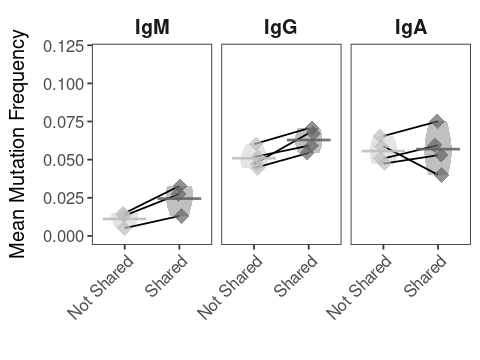

In [34]:
options(repr.plot.width=4, repr.plot.height=3)

m2 <- ggplot(mut_tab, aes(x=OVERLAP, y=MEAN)) +
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle = 45, hjust = 1, vjust = 1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("Mean Mutation Frequency")) +
    geom_violin(aes(fill=OVERLAP), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_line(aes(group = PATIENT)) +
    scale_fill_manual(values=OVERLAP_COLORS, name="Status") +
    scale_color_manual(values=OVERLAP_COLORS, name="Status") +
    scale_y_continuous(limits =c(0,0.12)) +
    geom_errorbarh(data=mut_sum, 
                   aes(y=MEAN, color=OVERLAP, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=OVERLAP), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    facet_grid(. ~ CREGION)
plot(m2)

In [35]:
plotFigure(m2, file.path(PLOT_DIR, "mut_overlap_blood.pdf"), 4, 3)

png 
  2

In [36]:
mut_tab %>% 
    group_by(CREGION) %>%
    do(computeTest(., value = "MEAN", comparison = "OVERLAP", pairing = "PATIENT"))

CREGION P_PAIR     P_UNPAIR   P_WILCOX  DIFF         COMPARE          
1 IgM     0.04355897 0.11526627 0.4000000 -0.013310437 Not Shared-Shared
2 IgG     0.02364863 0.05543721 0.1142857 -0.012000153 Not Shared-Shared
3 IgA     0.85990148 0.88195877 0.8857143 -0.001297106 Not Shared-Shared

In [37]:
aov(MEAN~CREGION*OVERLAP, data=mut_tab) %>% summary()

                Df   Sum Sq  Mean Sq F value   Pr(>F)    
CREGION          2 0.006568 0.003284  37.199 9.63e-07 ***
OVERLAP          1 0.000394 0.000394   4.465   0.0507 .  
CREGION:OVERLAP  2 0.000163 0.000081   0.923   0.4175    
Residuals       16 0.001413 0.000088                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# 3. Clonal Overlap
- Uses DF_FILTERED dataframe

In [31]:
# Exclude THY8 owing to sequencing depth (also consider THY4 exclusion)
DF %>%
    ungroup() %>%
    filter(TIME == "Thymus") %>%
    group_by(PATIENT) %>%
    summarize(COUNT = n())

PATIENT COUNT
1 THY1    18676
2 THY2    77179
3 THY3    73540
4 THY4     5338
5 THY5    32109
6 THY6    23763
7 THY7    22466
8 THY8     5070

In [187]:
DF %>%
    group_by(CLONE, PATIENT) %>%
    mutate(OVERLAP = if(all(c("0 Months" %in% TIME, "12 Months" %in% TIME))){"Persistent"}else{"Not Persistent"}) %>%
    runQuantifyOverlap(group = "PATIENT_TIME", clone = "CLONE_TOTAL", action = "frequency") %>%
    rowwise() %>%
    mutate(PATIENT = strsplit(as.character(PATIENT_TIME), '_')[[1]][1]) %>%
    mutate(COMPARISON = if(grepl(PATIENT, index)){"Intra-Patient"}else{"Inter-Patient"}) %>%
    filter(grepl("_Thymus", index), grepl("_0", PATIENT_TIME)) %>%
    group_by(COMPARISON, PATIENT) %>%
    summarize(OVERLAP = mean(OVERLAP))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

COMPARISON    PATIENT OVERLAP     
1  Inter-Patient THY1    9.109963e-03
2  Inter-Patient THY2    2.409634e-02
3  Inter-Patient THY3    2.291736e-04
4  Inter-Patient THY4    3.033771e-04
5  Inter-Patient THY5    8.488586e-05
6  Inter-Patient THY6    9.112428e-03
7  Inter-Patient THY7    1.225359e-03
8  Inter-Patient THY8    1.228761e-04
9  Intra-Patient THY1    2.814488e-02
10 Intra-Patient THY2    6.575180e-02
11 Intra-Patient THY3    3.147954e-04
12 Intra-Patient THY4    2.063071e-03
13 Intra-Patient THY5    4.574565e-04
14 Intra-Patient THY6    4.418364e-02
15 Intra-Patient THY7    4.869894e-03
16 Intra-Patient THY8    0.000000e+00

### View pairwise overlap (check noise)

In [192]:
all_count_clone_overlap_df <- DF_FILTERED %>%
    runQuantifyOverlap(group = "PATIENT_TIME", clone = "CLONE", action = "sorenson_bool")

In [193]:
all_count_clone_overlap_df %>%
    spread(PATIENT_TIME, OVERLAP)

index       THY1_0     THY1_12    THY1_Thymus THY2_0     THY2_12   
1  THY1_0      1.00000000 0.05276382 0.03942857  0.00000000 0.00000000
2  THY1_12     0.05276382 1.00000000 0.03633510  0.00000000 0.00000000
3  THY1_Thymus 0.03942857 0.03633510 1.00000000  0.00000000 0.00000000
4  THY2_0      0.00000000 0.00000000 0.00000000  1.00000000 0.06964819
5  THY2_12     0.00000000 0.00000000 0.00000000  0.06964819 1.00000000
6  THY2_Thymus 0.00000000 0.00000000 0.00000000  0.08165319 0.05673226
7  THY3_0      0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
8  THY3_12     0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
9  THY3_Thymus 0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
10 THY4_0      0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
11 THY4_12     0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
12 THY4_Thymus 0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
13 THY5_0      0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
14 THY5_12     0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
15 THY5_Thymus 0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
16 THY6_0      0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
17 THY6_12     0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
18 THY6_Thymus 0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
19 THY7_0      0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
20 THY7_12     0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
21 THY7_Thymus 0.00000000 0.00000000 0.00000000  0.00000000 0.00000000
   THY2_Thymus THY3_0       THY3_12      THY3_Thymus  ⋯ THY4_Thymus
1  0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
2  0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
3  0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
4  0.08165319  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
5  0.05673226  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
6  1.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
7  0.00000000  1.0000000000 0.2378854626 0.0006267409 ⋯ 0.000000000
8  0.00000000  0.2378854626 1.0000000000 0.0005577439 ⋯ 0.000000000
9  0.00000000  0.0006267409 0.0005577439 1.0000000000 ⋯ 0.000000000
10 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.003955920
11 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.002248454
12 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 1.000000000
13 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
14 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
15 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
16 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
17 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
18 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
19 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
20 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
21 0.00000000  0.0000000000 0.0000000000 0.0000000000 ⋯ 0.000000000
   THY5_0       THY5_12     THY5_Thymus  THY6_0     THY6_12     THY6_Thymus
1  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
2  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
3  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
4  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
5  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
6  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
7  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
8  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
9  0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
10 0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
11 0.0000000000 0.000000000 0.0000000000 0.00000000 0.000000000 0.000000000
12 0.0000000000 0.000000000 0.000

In [194]:
all_count_sequence_overlap_df <-  DF_FILTERED %>%
    runQuantifyOverlap(group = "PATIENT_TIME", clone = "SEQUENCE_IMGT", action = "count_bool")

In [195]:
all_count_sequence_overlap_df %>%
    spread(PATIENT_TIME, OVERLAP)

index       THY1_0 THY1_12 THY1_Thymus THY2_0 THY2_12 THY2_Thymus THY3_0
1  THY1_0      6966     15       23           0      0       0         0   
2  THY1_12       15   5030       14           0      0       0         0   
3  THY1_Thymus   23     14    18676           0      0       0         0   
4  THY2_0         0      0        0       29138    155     230         0   
5  THY2_12        0      0        0         155  13004     132         0   
6  THY2_Thymus    0      0        0         230    132   75708         0   
7  THY3_0         0      0        0           0      0       0       189   
8  THY3_12        0      0        0           0      0       0        26   
9  THY3_Thymus    0      0        0           0      0       0         0   
10 THY4_0         0      0        0           0      0       0         0   
11 THY4_12        0      0        0           0      0       0         0   
12 THY4_Thymus    0      0        0           0      0       0         0   
13 THY5_0         0      0        0           0      0       0         0   
14 THY5_12        0      0        0           0      0       0         0   
15 THY5_Thymus    0      0        0           0      0       0         0   
16 THY6_0         0      0        0           0      0       0         0   
17 THY6_12        0      0        0           0      0       0         0   
18 THY6_Thymus    0      0        0           0      0       0         0   
19 THY7_0         0      0        0           0      0       0         0   
20 THY7_12        0      0        0           0      0       0         0   
21 THY7_Thymus    0      0        0           0      0       0         0   
   THY3_12 THY3_Thymus ⋯ THY4_Thymus THY5_0 THY5_12 THY5_Thymus THY6_0 THY6_12
1    0         0       ⋯    0          0      0         0           0     0   
2    0         0       ⋯    0          0      0         0           0     0   
3    0         0       ⋯    0          0      0         0           0     0   
4    0         0       ⋯    0          0      0         0           0     0   
5    0         0       ⋯    0          0      0         0           0     0   
6    0         0       ⋯    0          0      0         0           0     0   
7   26         0       ⋯    0          0      0         0           0     0   
8  142         0       ⋯    0          0      0         0           0     0   
9    0     73540       ⋯    0          0      0         0           0     0   
10   0         0       ⋯    0          0      0         0           0     0   
11   0         0       ⋯    0          0      0         0           0     0   
12   0         0       ⋯ 5338          0      0         0           0     0   
13   0         0       ⋯    0        111     10         0           0     0   
14   0         0       ⋯    0         10    483         1           0     0   
15   0         0       ⋯    0          0      1     32109           0     0   
16   0         0       ⋯    0          0      0         0       12233     0   
17   0         0       ⋯    0          0      0         0           0  8605   
18   0         0       ⋯    0          0      0         0          43     0   
19   0         0       ⋯    0          0      0         0           0     0   
20   0         0       ⋯    0          0      0         0           0     0   
21   0         0       ⋯    0          0      0         0           0     0   
   THY6_Thymus THY7_0 THY7_12 THY7_Thymus
1      0         0      0         0      
2      0         0      0         0      
3      0         0      0         0      
4      0         0      0         0      
5      0         0      0         0      
6      0         0      0         0      
7      0         0      0         0      
8      0         0      0         0      
9      0         0      0         0      
10     0         0      0         0      
11     0         0      0         0      
12     0         0      0         0      
13     0         0      0         0      
14   

### Quantify as frequency of thymus

In [40]:
all_overlap_df <-  DF_FILTERED %>%
    runQuantifyOverlap(group = "PATIENT_TIME", clone = "CLONE_TOTAL", action = "frequency")

In [43]:
toplot_df <- all_overlap_df %>%
    rowwise() %>%
    mutate(PATIENT = strsplit(as.character(PATIENT_TIME), '_')[[1]][1]) %>%
    mutate(COMPARISON = if(grepl(PATIENT, index)){"Intra-Patient"}else{"Inter-Patient"}) %>%
    filter(grepl("_Thymus", index), grepl("_0", PATIENT_TIME)) %>%
    group_by(COMPARISON, PATIENT) %>%
    summarize(OVERLAP = mean(OVERLAP))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [44]:
toplot_df

COMPARISON    PATIENT OVERLAP     
1  Inter-Patient THY1    8.773925e-03
2  Inter-Patient THY2    2.386093e-02
3  Inter-Patient THY3    2.673692e-04
4  Inter-Patient THY4    3.087115e-04
5  Inter-Patient THY5    9.903351e-05
6  Inter-Patient THY6    8.776802e-03
7  Inter-Patient THY7    1.339129e-03
8  Intra-Patient THY1    2.814488e-02
9  Intra-Patient THY2    6.575180e-02
10 Intra-Patient THY3    3.147954e-04
11 Intra-Patient THY4    2.063071e-03
12 Intra-Patient THY5    4.574565e-04
13 Intra-Patient THY6    4.418364e-02
14 Intra-Patient THY7    4.869894e-03

In [45]:
overlap_sum <- toplot_df %>%
    group_by(COMPARISON) %>%
    summarize(MEAN=mean(OVERLAP, na.rm=T), SD=sd(OVERLAP, na.rm=T))  

In [46]:
overlap_sum

COMPARISON    MEAN       SD         
1 Inter-Patient 0.00620370 0.008717097
2 Intra-Patient 0.02082651 0.026011870

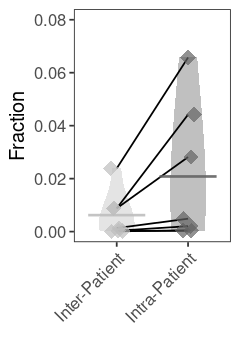

In [48]:
options(repr.plot.width=2, repr.plot.height=3)

p <- ggplot(toplot_df, aes(x=COMPARISON, y=OVERLAP)) + 
    baseTheme() + 
    scale_y_continuous(limits= c(0, 0.08)) +
    scale_fill_manual(values=OVERLAP_PATIENT_COLORS, name="Comparison") +
    scale_color_manual(values=OVERLAP_PATIENT_COLORS, name="Comparison") +
    geom_violin(aes(fill=COMPARISON), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
        #geom_line(aes(group = PAIR)) +
    geom_line(aes(group = PATIENT)) + 
    geom_errorbarh(data=overlap_sum, 
                       aes(y=MEAN, color=COMPARISON, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                       height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=COMPARISON), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    xlab("") +
    ylab("Fraction") +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12))
    #theme(axis.text.x=element_text(size=8, angle =45, hjust= 1, vjust=1), legend.position="none") +
plot(p)

In [49]:
plotFigure(p, file.path(PLOT_DIR, "0.pdf"), 2,3)

png 
  2

In [205]:
t.test(log(filter(toplot_df, COMPARISON == "Inter-Patient")$OVERLAP) - 
       log(filter(toplot_df, COMPARISON == "Intra-Patient")$OVERLAP), alternative="less")


	One Sample t-test

data:  log(filter(toplot_df, COMPARISON == "Inter-Patient")$OVERLAP) -     log(filter(toplot_df, COMPARISON == "Intra-Patient")$OVERLAP)
t = -5.8615, df = 6, p-value = 0.0005449
alternative hypothesis: true mean is less than 0
95 percent confidence interval:
       -Inf -0.8288796
sample estimates:
mean of x 
 -1.23994 


In [50]:
toplot_df <- all_overlap_df %>%
    rowwise() %>%
    mutate(PATIENT = strsplit(as.character(PATIENT_TIME), '_')[[1]][1]) %>%
    mutate(COMPARISON = if(grepl(PATIENT, index)){"Intra-Patient"}else{"Inter-Patient"}) %>%
    filter(grepl("_Thymus", index), grepl("_12", PATIENT_TIME)) %>%
    group_by(COMPARISON, PATIENT) %>%
    summarize(OVERLAP = mean(OVERLAP))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [51]:
overlap_sum <- toplot_df %>%
    group_by(COMPARISON) %>%
    summarize(MEAN=mean(OVERLAP, na.rm=T), SD=sd(OVERLAP, na.rm=T))  

In [52]:
overlap_sum

COMPARISON    MEAN        SD        
1 Inter-Patient 0.004614291 0.00574422
2 Intra-Patient 0.010123232 0.01378987

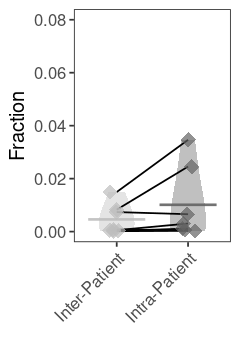

In [53]:
options(repr.plot.width=2, repr.plot.height=3)

p <- ggplot(toplot_df, aes(x=COMPARISON, y=OVERLAP)) + 
    baseTheme() + 
    scale_y_continuous(limits= c(0, 0.08)) +
    scale_fill_manual(values=OVERLAP_PATIENT_COLORS, name="Comparison") +
    scale_color_manual(values=OVERLAP_PATIENT_COLORS, name="Comparison") +
    geom_violin(aes(fill=COMPARISON), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
        #geom_line(aes(group = PAIR)) +
    geom_line(aes(group = PATIENT)) + 
    geom_errorbarh(data=overlap_sum, 
                       aes(y=MEAN, color=COMPARISON, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                       height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=COMPARISON), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    xlab("") +
    ylab("Fraction") +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12))
    #theme(axis.text.x=element_text(size=8, angle =45, hjust= 1, vjust=1), legend.position="none") +
plot(p)

In [54]:
plotFigure(p, file.path(PLOT_DIR, "12.pdf"), 2,3)

png 
  2

In [212]:
t.test(log(filter(toplot_df, COMPARISON == "Inter-Patient")$OVERLAP) - 
       log(filter(toplot_df, COMPARISON == "Intra-Patient")$OVERLAP), alternative="less")


	One Sample t-test

data:  log(filter(toplot_df, COMPARISON == "Inter-Patient")$OVERLAP) -     log(filter(toplot_df, COMPARISON == "Intra-Patient")$OVERLAP)
t = -2.7192, df = 6, p-value = 0.01734
alternative hypothesis: true mean is less than 0
95 percent confidence interval:
       -Inf -0.2185777
sample estimates:
 mean of x 
-0.7659164 


### Plot Venn diagrams

In [213]:
all_plot_list <- list()
count_list <- list()
for(target_patient in unique(DF_FILTERED$PATIENT)){
    input_df = DF_FILTERED %>%
        ungroup() %>%
        mutate(CLONE = CLONE_TOTAL)
    target_patient = target_patient
    #target_patient = '51T002-M5'

    times <- c('0 Months', '12 Months', 'Thymus')
    patients <- unique(input_df$PATIENT)

    # coerces limma venncount into a dataframe
    coerceDataFrame <- function(venncount){
        class(venncount) <- 'matrix'
        return(as.data.frame(venncount))
    }

    # isolate out thymus only clones
    blood_isolate <- input_df %>%
        filter(PATIENT == target_patient, TIME != "Thymus") %>%
        group_by(CLONE, PATIENT, TIME) %>%
        summarize(BOOL = TRUE)

    # isolate out blood only clones (per patient)
    thymus_isolate <- input_df %>%
        filter(TIME == "Thymus") %>%
        group_by(CLONE, PATIENT, TIME) %>%
        summarize(BOOL = TRUE)

    # compute sharing between thymus and blood for each patient 
    data_list <- list()
    for(patient in patients){
        data_list[[patient]] <- bind_rows(thymus_isolate, blood_isolate) %>%
            ungroup() %>%
            filter(TIME != 'Thymus' | PATIENT == patient) %>%
            select(-PATIENT) %>%
            spread(TIME, BOOL) %>% 
            mutate_all(funs(ifelse(is.na(.), FALSE, .))) %>% select(-CLONE)
    }

    # compute vennCounts for each patient, capture the mean count for within/without comparisons
    data_df <- bind_rows(data_list, .id="PATIENT") %>%
        group_by(PATIENT) %>%
        do(coerceDataFrame((vennCounts(select(., -PATIENT))))) %>% 
        ungroup() %>%
        mutate(SAME = PATIENT == target_patient) %>%
        select(-PATIENT) %>%
        group_by(SAME, !!!rlang::syms(times)) %>%
        summarize(MEAN = mean(Counts), SD = sd(Counts))
    
    # isolate the same and different venn counts
    df.vdc_same <- data_df %>% ungroup() %>% filter(SAME) %>% select(-SAME) %>% tail(-1) %>%
      mutate(x = c(0, 1.2, 0.8, -1.2, -0.8, 0, 0),
             y = c(1.2, -0.6, 0.5, -0.6, 0.5, -1, 0))

    df.vdc_diff <- data_df %>% ungroup() %>% filter(!SAME) %>% select(-SAME)  %>% tail(-1) %>%
      mutate(x = c(0, 1.2, 0.8, -1.2, -0.8, 0, 0),
             y = c(1.2, -0.6, 0.5, -0.6, 0.5, -1, 0)) %>%
     mutate(MEAN = round(MEAN, digits=0), SD = round(SD/sqrt(n()), digits = 0), 
            LABEL = paste0(as.character(MEAN), '±', as.character(SD)))
    
    count_list[[target_patient]] <- bind_rows(
        df.vdc_same %>% mutate(TYPE = "SAME"),
        df.vdc_diff %>% mutate(TYPE = "DIFF")
    )
    
    # set labels
    labels <- data_df %>% ungroup() %>% select(-SAME, -MEAN, -SD) %>% colnames()

    # set up positions for plotting
    df.venn <- data.frame(x = c(-0.866, 0.866,0),
                          y = c(-0.5, -0.5, 1),
                          labels = labels)

    plot_list <- list()

    plot_list[['SAME']] <- ggplot(df.venn) +
      geom_circle(aes(x0 = x, y0 = y, r = 1.5, fill = labels), alpha = .3, size = 1, colour = 'grey') +
      coord_fixed() +
      theme_void() +
      theme(legend.position = 'bottom') +
      scale_fill_manual(values = TIME_COLORS) +
      scale_colour_manual(values = TIME_COLORS, guide = FALSE) +
      labs(fill = NULL) +
      annotate("text", x = df.vdc_same$x, y = df.vdc_same$y, label = df.vdc_same$MEAN, size = 5)

    plot_list[['DIFF']] <- ggplot(df.venn) +
      geom_circle(aes(x0 = x, y0 = y, r = 1.5, fill = labels), alpha = .3, size = 1, colour = 'grey') +
      coord_fixed() +
      theme_void() +
      theme(legend.position = 'bottom') +
      scale_fill_manual(values = TIME_COLORS) +
      scale_colour_manual(values = TIME_COLORS, guide = FALSE) +
      labs(fill = NULL) +
      annotate("text", x = df.vdc_diff$x, y = df.vdc_diff$y, label = df.vdc_diff$LABEL, size = 5)

    all_plot_list[[target_patient]] <- plot_list
}

In [214]:
bind_rows(count_list, .id="PATIENT") %>%
    filter(!!rlang::sym("0 Months"), !!rlang::sym("Thymus")) %>%
    group_by(PATIENT, TYPE) %>%
    summarize(COUNT = sum(MEAN)) %>%
    group_by(TYPE) %>%
    summarize(MEAN = mean(COUNT))

TYPE MEAN     
1 DIFF  90.57143
2 SAME 482.85714

In [215]:
bind_rows(count_list, .id="PATIENT") %>%
    filter(!!rlang::sym("12 Months"), !!rlang::sym("Thymus")) %>%
    group_by(PATIENT, TYPE) %>%
    summarize(COUNT = sum(MEAN)) %>%
    group_by(TYPE) %>%
    summarize(MEAN = mean(COUNT))

TYPE MEAN     
1 DIFF  65.71429
2 SAME 245.71429

In [216]:
bind_rows(count_list, .id="PATIENT") %>%
    filter(!!rlang::sym("0 Months"), !!rlang::sym("Thymus"), !!rlang::sym("12 Months")) %>%
    group_by(PATIENT, TYPE) %>%
    summarize(COUNT = sum(MEAN)) %>%
    group_by(TYPE) %>%
    summarize(MEAN = mean(COUNT))

TYPE MEAN
1 DIFF  32 
2 SAME 104

In [217]:
for(patient in names(all_plot_list)){
    plotFigure(all_plot_list[[patient]][['DIFF']], file.path(PLOT_DIR, paste(patient, "diffvenn.pdf", sep = '_')), 4, 4)
}

In [218]:
for(patient in names(all_plot_list)){
    plotFigure(all_plot_list[[patient]][['SAME']], file.path(PLOT_DIR, paste(patient, "samevenn.pdf", sep = '_')),4 , 4)
}

### Significance of 3-way overlap (overlap of persistent with thymus)

In [55]:
DF_FILTERED_TRIPLE <- DF_FILTERED %>%
    ungroup() %>%
    filter(TIME == "Thymus" | OVERLAP == "Persistent") %>%
    rowwise() %>%
    mutate(TIME = as.character(TIME)) %>%
    mutate(THYMUS = if(TIME == "Thymus"){TIME}else{"Blood"}) %>%
    mutate(PATIENT_THYMUS = paste(as.character(PATIENT), THYMUS, sep = "_")) 

In [56]:
triple_overlap_df <- DF_FILTERED_TRIPLE  %>%
    runQuantifyOverlap(group = "PATIENT_THYMUS", clone = "CLONE_TOTAL", action = "frequency")

In [57]:
toplot_df <- triple_overlap_df %>%
    rowwise() %>%
    mutate(PATIENT = strsplit(as.character(PATIENT_THYMUS), '_')[[1]][1]) %>%
    filter(PATIENT != "THY8") %>%
    mutate(WITHIN = grepl(PATIENT, index)) %>%
    filter(grepl("_Blood", PATIENT_THYMUS), grepl("_Thymus", index)) %>%
    group_by(WITHIN, PATIENT) %>%
    summarize(OVERLAP = mean(OVERLAP)) %>%
    mutate(COMPARISON = if(WITHIN){"Intra-Patient"}else{"Inter-Patient"}) 

Warning message:
“Grouping rowwise data frame strips rowwise nature”Warning message in if (WITHIN) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (WITHIN) {:
“the condition has length > 1 and only the first element will be used”

In [58]:
overlap_sum <- toplot_df %>%
    group_by(COMPARISON) %>%
    summarize(MEAN=mean(OVERLAP, na.rm=T), SD=sd(OVERLAP, na.rm=T))  

In [59]:
overlap_sum

COMPARISON    MEAN        SD         
1 Inter-Patient 0.002520506 0.003948786
2 Intra-Patient 0.003974905 0.005924361

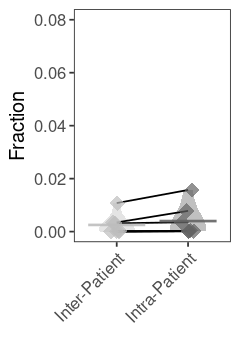

In [60]:
options(repr.plot.width=2, repr.plot.height=3)

p <- ggplot(toplot_df, aes(x=COMPARISON, y=OVERLAP)) + 
    baseTheme() + 
    scale_y_continuous(limits= c(0, 0.08)) +
    scale_fill_manual(values=OVERLAP_PATIENT_COLORS, name="Comparison") +
    scale_color_manual(values=OVERLAP_PATIENT_COLORS, name="Comparison") +
    geom_violin(aes(fill=COMPARISON), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
        #geom_line(aes(group = PAIR)) +
    geom_line(aes(group = PATIENT)) + 
    geom_errorbarh(data=overlap_sum, 
                       aes(y=MEAN, color=COMPARISON, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                       height=0, size=0.75, position=position_dodge(0.9), alpha=0.9) +
    geom_point(aes(color=COMPARISON), position=position_jitter(w = 0.1, h = 0), size=4, pch=18, alpha=0.7) +
    xlab("") +
    ylab("Fraction") +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12))
    #theme(axis.text.x=element_text(size=8, angle =45, hjust= 1, vjust=1), legend.position="none") +
plot(p)

In [61]:
plotFigure(p, file.path(PLOT_DIR, "triple.pdf"), 2,3)

png 
  2

In [286]:
t.test(log(filter(toplot_df, COMPARISON == "Inter-Patient")$OVERLAP) - 
       log(filter(toplot_df, COMPARISON == "Intra-Patient")$OVERLAP), alternative="less")


	One Sample t-test

data:  log(filter(toplot_df, COMPARISON == "Inter-Patient")$OVERLAP) -     log(filter(toplot_df, COMPARISON == "Intra-Patient")$OVERLAP)
t = -3.2387, df = 6, p-value = 0.008858
alternative hypothesis: true mean is less than 0
95 percent confidence interval:
       -Inf -0.3427727
sample estimates:
 mean of x 
-0.8569121 


# 4. Individual Clone Analysis

### Formal tree plotting

In [74]:
TIME_COLORS <- colorRampPalette(brewer.pal(8, "Paired"))(length(unique(DF_FILTERED$TIME)))
names(TIME_COLORS) <- unique(DF_FILTERED$TIME)
COLORS <- TIME_COLORS

#CREGION_ATTR <- setNames(names(IG_COLORS), IG_COLORS)
CREGION_COLORS <- c("#332288", "#88CCEE", "#117733", "#DDCC77", "#CC6677")
names(CREGION_COLORS) <- c("IgM", "IgD","IgE","IgA","IgG")
CREGION_ATTR <- setNames(names(CREGION_COLORS), CREGION_COLORS)

formatGraph <- function(g){
    
    #Vertex color
    #V(g)$color <- translateStrings(V(g)$CREGION, CREGION_ATTR)

    #Vertex color
    V(g)$color <- sapply(V(g)$TIME, function(time)
        if(grepl(",", time)){
            return("#AAAAAA")
        } else {
            return(COLORS[time])
        }
    )                  
    V(g)$color[grepl("Inferred", V(g)$name)] <- "#FFFFFF"
    V(g)$color[V(g)$name == "Germline"] <- "#000000"
    V(g)$color[grepl("Inferred", V(g)$name)] <- "#FFFFFF"
                         
    # Vertex shape
    V(g)$shape <- rep("circle", length(V(g)$name))
    V(g)$shape[is.na(V(g)$shape)] <- "circle"

    # Vertex text
    uid <- !grepl("Inferred|Germline", V(g)$name)
    inferred <- grepl("Inferred", V(g)$name)
    germline <- grepl("Germline", V(g)$name)
    V(g)$label[inferred] <- ""
    V(g)$label[germline] <- ""
    V(g)$label[uid] <- V(g)$CREGION[uid]

    # Vertex size
    V(g)$size[inferred] <- 2
    V(g)$size[germline] <- 10
    V(g)$size[uid] <- 10

    # Edge labels
    E(g)$label <- E(g)$weight
    #E(g)$label <- ""
                         
    
    return(g)
}

In [45]:
toplot_clones <- DF_SELECT_TREES %>% select(PATIENT_CLONE) %>% unique() %>% unlist()

In [46]:
for(g in toplot_clones){
    cat(g, '\n')
    # Plot graph as a tree
    pdf(file.path(PLOT_DIR, paste0(g, "_tree.pdf")), width = 7, height = 6)
    ly <- layout.reingold.tilford(GRAPHS[[g]], root="Germline", circular=F, flip.y=T)
    plot(formatGraph(GRAPHS[[g]]), layout=ly,
         rescale=T,
              edge.arrow.mode=0, 
         edge.label.color="black", 
             edge.label.family="Helvetica",
             edge.label.cex=0.4,
         vertex.frame.color="black",
         vertex.label.color="black",
            vertex.label.family="Helvetica",
            vertex.label.cex=0.5, ylim=c(-1,1))
    dev.off()
}

THY2,29160 
THY2,84199 


In [48]:
plot_file <- paste0("Legend", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")

pdf(file.path(PLOT_DIR, plot_file), 5.5,5.5 , bg = "transparent")

plot.new()
# Add legend
legend_colors <- COLORS
legend("topleft", 
       c("Germline", "Inferred", "Thymus,0 Months", names(legend_colors)),
       fill=c("#000000", "#FFFFFF", "#AAAAAA", legend_colors), 
       bty="n",
       cex=2)

dev.off()

png 
  2

### Plot alignments of clones

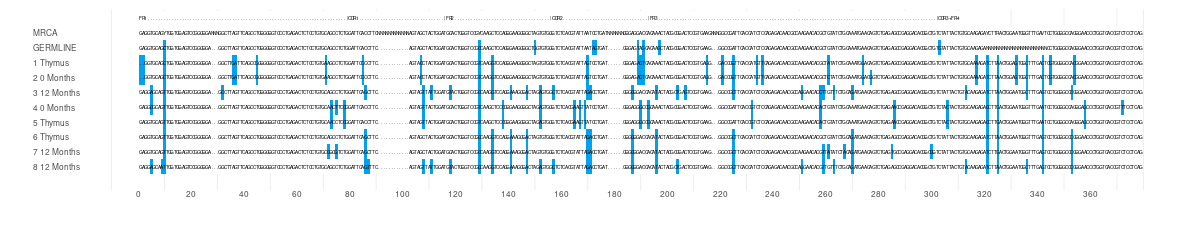

In [141]:
options(repr.plot.width=10, repr.plot.height=2)
p <- DF_SPANNING_COLLAPSE %>%
    filter(PATIENT_CLONE == toplot_clones[1]) %>%
    ungroup() %>%
    mutate(ROW = row_number()) %>%
    plotAlignment(NAMES=c("ROW","TIME"), ambig_char='N')
plot(p)

In [142]:
plotFigure(p, file.path(PLOT_DIR, paste0(toplot_clones[1], "_alignment_dna.pdf")), 10, 2)

png 
  2

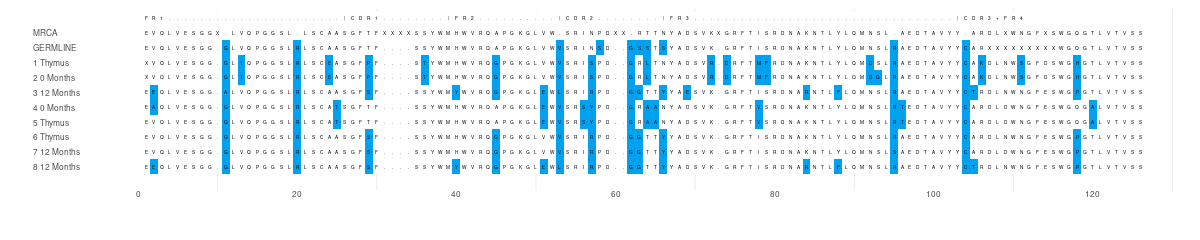

In [143]:
options(repr.plot.width=10, repr.plot.height=2)
p <- DF_SPANNING_COLLAPSE %>%
    filter(PATIENT_CLONE == toplot_clones[1]) %>%
    ungroup() %>%
    mutate(ROW = row_number()) %>%
    plotAlignment(NAMES=c("ROW","TIME"), ambig_char='X', aa_bool=TRUE)
plot(p)

In [144]:
plotFigure(p, file.path(PLOT_DIR, paste0(toplot_clones[1], "_alignment_aa.pdf")), 10, 2)

png 
  2

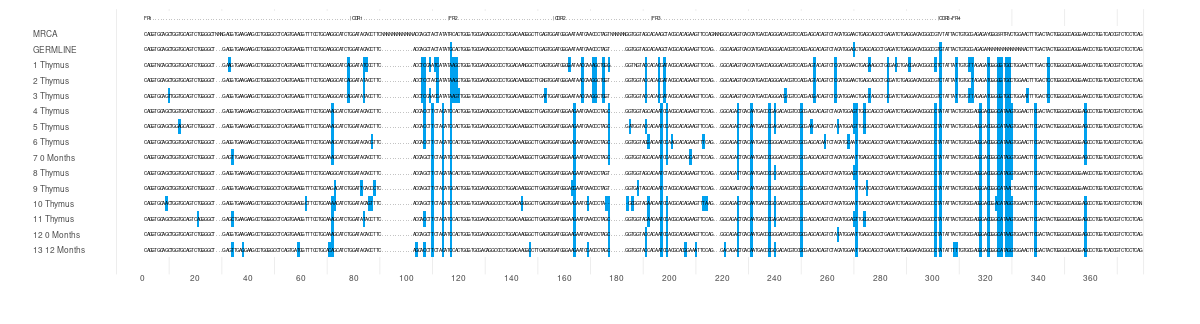

In [153]:
options(repr.plot.width=10, repr.plot.height=2.7)
p <- DF_SPANNING_COLLAPSE %>%
    filter(PATIENT_CLONE == toplot_clones[2]) %>%
    ungroup() %>%
    mutate(ROW = row_number()) %>%
    plotAlignment(NAMES=c("ROW","TIME"), ambig_char='N')
plot(p)

In [154]:
plotFigure(p, file.path(PLOT_DIR, paste0(toplot_clones[2], "_alignment_dna.pdf")), 10, 2.7)

png 
  2

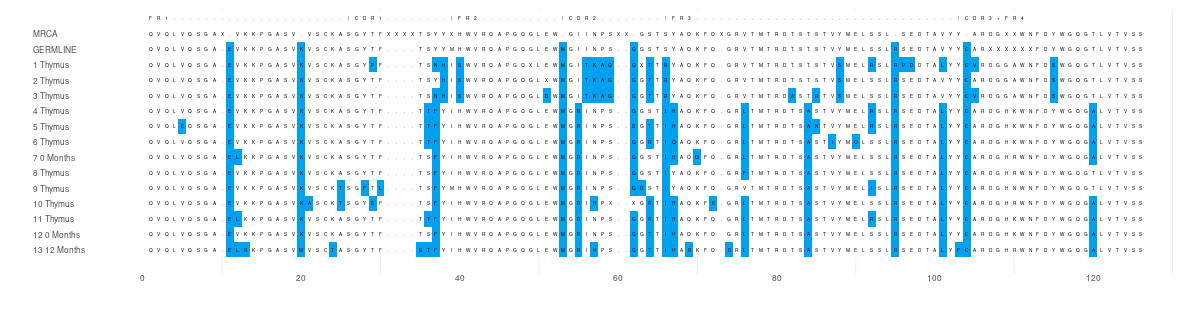

In [155]:
options(repr.plot.width=10, repr.plot.height=2.7)
p <- DF_SPANNING_COLLAPSE %>%
    filter(PATIENT_CLONE == toplot_clones[2]) %>%
    ungroup() %>%
    mutate(ROW = row_number()) %>%
    plotAlignment(NAMES=c("ROW","TIME"), ambig_char='X', aa_bool=TRUE)
plot(p)

In [156]:
plotFigure(p, file.path(PLOT_DIR, paste0(toplot_clones[2], "_alignment_aa.pdf")), 10, 2.7)

png 
  2

# Change in overlap with time

In [13]:
overlap_df <- DF_FILTERED %>%
    group_by(PATIENT) %>%
    do(runQuantifyOverlap(., clone='CLONE', group='TIME', action='sorenson_bool'))

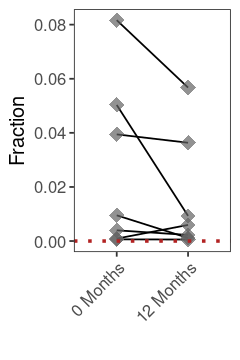

In [63]:
options(repr.plot.width=2, repr.plot.height=3)
p <- overlap_df %>%
    filter(index == "Thymus", TIME != "Thymus", TIME != "Posterior") %>%
    ggplot(aes(x=TIME, y=OVERLAP)) +
    baseTheme() +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    #theme(axis.text.x=element_text(size=8, angle =45, hjust= 1, vjust=1), legend.position="none") +
    geom_line(aes(group=PATIENT)) +
    geom_point(aes(),color = '#636363',size=4, pch=18, alpha=0.7) + 
    xlab("") +
    ylab("Fraction") +
#     scale_fill_manual() +
#     scale_colour_manual(col = '#636363', guide = FALSE) +
    geom_hline(yintercept = 0, linetype="dotted", color="firebrick", size=1)
plot(p)

In [64]:
plotFigure(p, file.path(PLOT_DIR, "decline.pdf"), 2,3)

png 
  2

In [248]:
t.test(
    overlap_df %>%
        filter(index == "Thymus", TIME == '0 Months') %>% ungroup() %>% select(OVERLAP) %>%  unlist(),
    overlap_df %>%
        filter(index == "Thymus", TIME == '12 Months') %>% ungroup() %>% select(OVERLAP) %>%  unlist(),
       paired=TRUE, alternative = 'greater')


	Paired t-test

data:  overlap_df %>% filter(index == "Thymus", TIME == "0 Months") %>%  and overlap_df %>% filter(index == "Thymus", TIME == "12 Months") %>%     ungroup() %>% select(OVERLAP) %>% unlist() and     ungroup() %>% select(OVERLAP) %>% unlist()
t = 1.7018, df = 6, p-value = 0.06985
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.001501806          Inf
sample estimates:
mean of the differences 
             0.01058807 


In [14]:
igg_overlap_df <- DF_FILTERED %>%
    filter(CREGION == "IgG") %>%
    group_by(PATIENT) %>%
    do(runQuantifyOverlap(., clone='CLONE', group='TIME', action='sorenson_bool'))

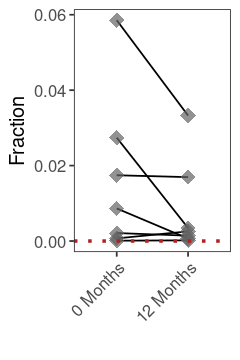

In [66]:
p <- igg_overlap_df %>%
    filter(index == "Thymus", TIME != "Thymus") %>%
    ggplot(aes(x=TIME, y=OVERLAP)) +
    baseTheme() +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    #theme(axis.text.x=element_text(size=8, angle =45, hjust= 1, vjust=1), legend.position="none") +
    geom_line(aes(group=PATIENT)) +
    geom_point(aes(),color = '#636363',size=4, pch=18, alpha=0.7) + 
    xlab("") +
    ylab("Fraction") +
#     scale_fill_manual() +
#     scale_colour_manual(col = '#636363', guide = FALSE) +
    geom_hline(yintercept = 0, linetype="dotted", color="firebrick", size=1)
plot(p)

In [67]:
plotFigure(p, file.path(PLOT_DIR, "igg_decline.pdf"), 2,3)

png 
  2

In [244]:
t.test(
    igg_overlap_df %>%
        filter(index == "Thymus", TIME == '0 Months') %>% ungroup() %>% select(OVERLAP) %>%  unlist(),
    igg_overlap_df %>%
        filter(index == "Thymus", TIME == '12 Months') %>% ungroup() %>% select(OVERLAP) %>%  unlist(),
       paired=TRUE, alternative = 'greater')


	Paired t-test

data:  igg_overlap_df %>% filter(index == "Thymus", TIME == "0 Months") %>%  and igg_overlap_df %>% filter(index == "Thymus", TIME == "12 Months") %>%     ungroup() %>% select(OVERLAP) %>% unlist() and     ungroup() %>% select(OVERLAP) %>% unlist()
t = 1.8201, df = 6, p-value = 0.05931
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.0005457649           Inf
sample estimates:
mean of the differences 
            0.008067791 


# Clinical correlates

In [76]:
clinical_df <- read.csv(CLINICAL_FILE)  %>%
    left_join(by="PATIENT", y=overlap_df %>%
        filter(index == "Thymus", TIME != "Thymus") %>%
        select(-X, -index) %>%
        mutate(OVERLAP = log(OVERLAP)) %>%
        spread(TIME, OVERLAP) %>%
        rename(ALL_0 = !!rlang::sym("0 Months"), ALL_1 = !!rlang::sym("12 Months"))
             ) %>%
    left_join(by="PATIENT", y=igg_overlap_df %>%
        filter(index == "Thymus", TIME != "Thymus") %>%
        select(-X, -index) %>%
        mutate(OVERLAP = log(OVERLAP)) %>%
        spread(TIME, OVERLAP) %>%
        rename(IGG_0 = !!rlang::sym("0 Months"), IGG_1 = !!rlang::sym("12 Months"))
             ) %>%
    mutate(DIFF_ALL = ALL_1 - ALL_0, 
           DIFF_IGG = IGG_1 - IGG_0, 
           DIFF_QMG = QMG_2 - QMG_1,
           DIFF_QMG3 = QMG_3 - QMG_1,
           DIFF_QMG_BASELINE = QMG_1 - QMG_BASELINE,
           DIFF_STEROID = STEROID_2 - STEROID_1, 
           DIFF_STEROID3 = STEROID_3 - STEROID_1, 
           DIFF_TITER1 = log(TITER_1/TITER_0),
           DIFF_TITER2 = log(TITER_2/TITER_1),
           DIFF_TITER3 = log(TITER_3/TITER_1),
           DIFF_ABS_TITER2 = 100*((TITER_2/TITER_1) - 1),
           DIFF_ABS_TITER3 = 100*((TITER_3/TITER_1) - 1)
          )

### Direct correlation with clinical outcomes at end of trial

In [17]:
direct_list <- list(
"1"= c("ALL_1", "STEROID_3"),
"2"= c("ALL_1", "QMG_3"),
"3"= c("IGG_1", "STEROID_3"),
"4"= c("IGG_1", "QMG_3"),
"5"= c("TITER_1", "STEROID_3"),
"6"= c("TITER_1", "QMG_3")
)

In [18]:
fancy_labels <- c(
"ALL_1"="Log Total Overlap",
"IGG_1"="Log IgG Overlap",
"TITER_1"="anti-AChR Titer",
'DIFF_QMG'='QMG Change',
'DIFF_ALL'='Total Overlap Change',
'STEROID_3'="Endpoint Steroid (mg)"
)

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

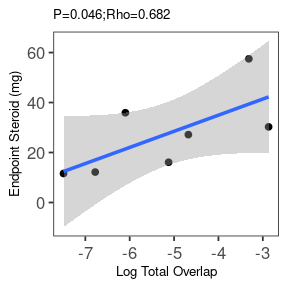

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

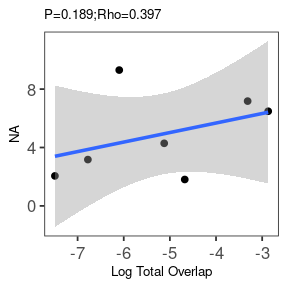

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

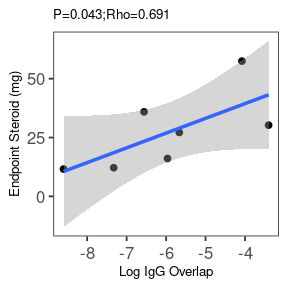

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

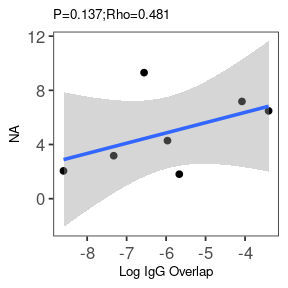

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

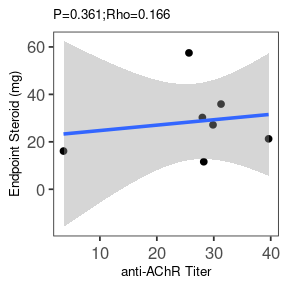

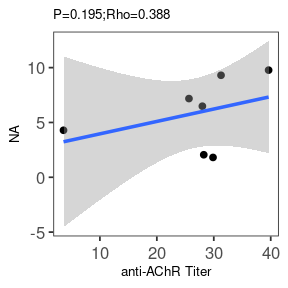

In [263]:
for(comparison_name in names(direct_list)){
    
    comparison <- direct_list[[comparison_name]]
    
    test <- cor.test(clinical_df[,comparison[1]], clinical_df[,comparison[2]], 
                 na.rm=TRUE, alternative="greater")
    
    options(repr.plot.height=2.4, repr.plot.width=2.4)
    p <- ggplot(clinical_df, aes(x=!!rlang::sym(comparison[1]), y=!!rlang::sym(comparison[2]))) +
        geom_point() + 
        baseTheme() + 
        geom_smooth(method = "lm") +
        ggtitle(paste0("P=", as.character(round(test$p.value,3)), ";", "Rho=", as.character(round(test$estimate,3)))) +
        theme(legend.position="bottom", axis.title.x=element_text(size=8), axis.text.x=element_text(size=10), axis.title.y=element_text(size=8), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
        xlab(fancy_labels[comparison[1]]) +
        ylab(fancy_labels[comparison[2]])
    plot(p)
    
    plotFigure(p, file.path(PLOT_DIR, paste0(comparison[1], "VS", comparison[2], ".pdf")), 2.4, 2.4)
    
}

### Correlation with change in clinical after 1 year

In [77]:
change_list <- list(
"1"= c("DIFF_ALL", "DIFF_STEROID"),
"2"= c("DIFF_ALL", "DIFF_QMG"),
"3"= c("DIFF_ALL", "DIFF_ABS_TITER2"),
"4"= c("DIFF_IGG", "DIFF_STEROID"),
"5"= c("DIFF_IGG", "DIFF_QMG"),
"6"= c("DIFF_IGG", "DIFF_ABS_TITER2"),
#"7"= c("DIFF_ALL", "DIFF_QMG_BASELINE"),
#"8"= c("DIFF_IGG", "DIFF_QMG_BASELINE"),
# "9"= c("DIFF_ALL", "ALL_0"),
"18" = c("DIFF_ALL", "DURATION"),
"19" = c("DIFF_IGG", "DURATION"),
"34" = c("DIFF_ABS_TITER2", "DIFF_QMG"),
"35" = c("DIFF_ABS_TITER2", "DIFF_STEROID"),
"38"= c("DIFF_ALL", "DIFF_ABS_TITER2"),
"39"= c("DIFF_IGG", "DIFF_ABS_TITER2"),
"40"= c("DIFF_ALL", "DIFF_ABS_TITER3"),
"41"= c("DIFF_IGG", "DIFF_ABS_TITER3")
)

In [84]:
fancy_labels <- c(
"DIFF_ALL"="Log Fold Change Total Sharing",
"DIFF_IGG"="Log Fold Change IgG Sharing",
"DIFF_TITER2"="AChR-Ab Titer Change Yr2 vs Yr 1",
"DIFF_ABS_TITER2"="AChR-Ab Titer % Change Yr2 vs Yr 1",
"DIFF_ABS_TITER3"="AChR-Ab Titer % Change Yr3 vs Yr 1",
'DIFF_QMG'='QMG Change Yr 2 vs Yr 1',
'DIFF_QMG_BASELINE'='QMG Change Yr 1 vs Yr 0',
'DIFF_STEROID'="Steroid Dose (mg) Change Yr 2 vs Yr 1",
"ALL_0"="Initial Total Sharing",
'DURATION'='Disease Duration (Yrs)'
)

In [87]:
for(comparison_name in names(change_list)){
    
    comparison <- change_list[[comparison_name]]
    
    test <- cor.test(clinical_df[,comparison[1]], clinical_df[,comparison[2]], 
                 na.rm=TRUE, alternative="greater")
    
    options(repr.plot.height=3.5, repr.plot.width=3.5)
    p <- ggplot(clinical_df, aes(x=!!rlang::sym(comparison[1]), y=!!rlang::sym(comparison[2]))) +
        geom_point() + 
        baseTheme() + 
        geom_smooth(method = "lm", color="#707070") +
        ggrepel::geom_label_repel(data=clinical_df, aes_string(x=comparison[1], 
                                             y=comparison[2], label = "PATIENT"), size = 3, alpha = 0.8) +
        ggtitle(paste0("P=", as.character(round(test$p.value,3)), ";", "Rho=", as.character(round(test$estimate,3)))) +
        theme(legend.position="bottom", axis.title.x=element_text(size=10), axis.text.x=element_text(size=10), 
              axis.title.y=element_text(size=10), axis.text.y=element_text(size=10), 
              plot.title=element_text(size=10),
              strip.text=element_text(size=12), legend.text=element_text(size=10), 
              legend.title=element_text(size=12)) +
        xlab(fancy_labels[comparison[1]]) +
        ylab(fancy_labels[comparison[2]])
    plot(p)
    
    plotFigure(p, file.path(PLOT_DIR, paste0(comparison[1], "VS", comparison[2], "_rebuttal.pdf")), 3.5, 3.5)
}

In [271]:
clinical_df %>% select(PATIENT, DIFF_QMG, DIFF_QMG_BASELINE, DIFF_STEROID, DIFF_TITER, DIFF_ALL, DIFF_IGG) %>% drop_na(DIFF_ALL)

PATIENT DIFF_QMG    DIFF_QMG_BASELINE DIFF_STEROID DIFF_TITER  DIFF_ALL  
1 THY6    -0.91611344  -5.575067        -21.21492    -0.04436653 -1.6881256
2 THY7    -1.09313763 -11.730352        -18.60560             NA -2.1211288
3 THY2    -0.96840659  -4.134615        -10.95221     0.12096889 -0.3641380
5 THY1     0.47197029  -2.876963        -10.63101    -0.22022270 -0.0817064
6 THY3     0.49553571  -6.250000        -19.00483     0.25272986 -0.1166333
7 THY4     0.07622319  -1.183511        -13.37993    -0.21097057 -0.5649702
8 THY5     0.39911596 -10.491914          0.00000     1.13810302  1.8776450
  DIFF_IGG  
1 -2.0691135
2 -2.5756546
3 -0.5655058
5 -0.0297326
6  0.6933775
7 -0.4026322
8  1.2909647

In [73]:
clinical_df %>% drop_na(DIFF_ALL) %>%
    summarize(DIFF_ALL_MEAN = mean(DIFF_ALL), DIFF_ALL_SD = sd(DIFF_ALL, na.rm=T),
              DIFF_IGG_MEAN = mean(DIFF_IGG), DIFF_IGG_SD = sd(DIFF_IGG, na.rm=T))

DIFF_ALL_MEAN DIFF_ALL_SD DIFF_IGG_MEAN DIFF_IGG_SD
1 -0.4370082    1.291623    -0.5226138    1.39245

In [ ]:
-0.957848754579208

In [296]:
# convert to fold
1 - exp(-2.753)

[1] 0.9362636